# CS 4820
# Assignment 6: Can AI read our mind?

# Due: 2:00pm October 16, 2019

Recently, in one of the elementary schools in China, an interesting question on the entrance exam for the 1st graders says:

    Given that 1111=0,3388= 4,1289=3,9090=4,2256=1, what is 1868?

Many kids figured it out after realizing that the trick is simply to count the number of “circles” among the digits on the left hand side of the equation (e.g., there is no circle in 1111, 4 circles in 3388, 3 circles in 1289, etc.). Therefore, the answer is 1868=5. However, such pattern/rule is truly arbitrary and is only implicitly specified in our mind. A different rule would lead to a completely different result. 

In this assignment, students will build an Artificial Neural Network to work on this question. They will go through the whole deep learning development cycle from creating the training and testing data sets, to building a deep neural network using Keras, training it and testing it, and to experimenting with various architectures of the neural net, choosing different combinations of activation functions, cost functions, and optimizers. Ultimately, based on their experiments, students would draw their conclusion to the question “can AI read our mind?”

### Prepare training and testing data

In [1]:
# Import all necessary modules in addition to numpy
import numpy as np

# your code here ...
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Create 10,000 data

# Let's begin with creating two empty numpy arrays
training_data = np.empty(shape=[0, 4])
target_data = np.empty(shape=[0, 1])

# Use nested for loops to populate these two numpty arrays with pairs of data.
# Each pair is a four-digit number and a target value satisfying the hidden rule 
# that you've discovered between these digits.

# You should find the np.vstack() function handy.
# your code here ...
for n in itertools.product(range(10), repeat=4):
    count = 0
    training_data = np.vstack((training_data, n))
    for char in n:
        if char == 0:
            count += 1
        if char == 6:
            count += 1
        if char == 8:
            count += 2
        if char == 9:
            count += 1
    target_data = np.vstack((target_data, count))

# Split the data into training and testing data sets
# Also, convert the target sets into one-hot encoded categorical values

# your code here ...
onehotencoder = OneHotEncoder(categorical_features = [0, 1, 2, 3])
X_cat = onehotencoder.fit_transform(training_data).toarray()
#X_cat = to_categorical(training_data, num_classes=3)
y_cat = to_categorical(target_data)

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 0)
X_train.shape
y_train.shape

C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(8000, 40)

(8000, 9)

### Build and train the model

Train on 7200 samples, validate on 800 samples
Epoch 1/30
7200/7200 - 5s - loss: 1.6611 - accuracy: 0.3951 - val_loss: 1.2775 - val_accuracy: 0.5450
Epoch 2/30
7200/7200 - 3s - loss: 1.0740 - accuracy: 0.6599 - val_loss: 0.8966 - val_accuracy: 0.7725
Epoch 3/30
7200/7200 - 4s - loss: 0.7859 - accuracy: 0.8176 - val_loss: 0.6884 - val_accuracy: 0.8313
Epoch 4/30
7200/7200 - 4s - loss: 0.6154 - accuracy: 0.8289 - val_loss: 0.5471 - val_accuracy: 0.8313
Epoch 5/30
7200/7200 - 3s - loss: 0.4996 - accuracy: 0.8289 - val_loss: 0.4487 - val_accuracy: 0.8313
Epoch 6/30
7200/7200 - 3s - loss: 0.4064 - accuracy: 0.8550 - val_loss: 0.3538 - val_accuracy: 0.9575
Epoch 7/30
7200/7200 - 3s - loss: 0.3153 - accuracy: 0.9589 - val_loss: 0.2670 - val_accuracy: 0.9575
Epoch 8/30
7200/7200 - 3s - loss: 0.2402 - accuracy: 0.9589 - val_loss: 0.2050 - val_accuracy: 0.9575
Epoch 9/30
7200/7200 - 4s - loss: 0.1886 - accuracy: 0.9589 - val_loss: 0.1629 - val_accuracy: 0.9575
Epoch 10/30
7200/7200 - 4s - loss: 

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

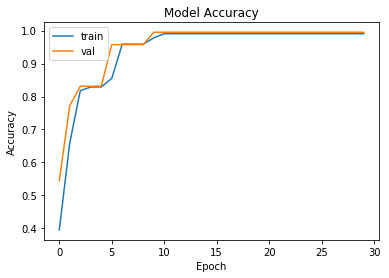

In [4]:
# Build a deep neural net to solve this multi-class classification problem
# Refer to the tutorials and notes that you had from previous classes as your clarifications and examples

# your code here ...
model = Sequential()
model.add(Dense(3, input_dim = 40, activation = 'tanh'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train your neural net

# your code here ...
history = model.fit(np.asarray(X_train), y_train, validation_split=0.1, batch_size = 5, epochs = 30, verbose=2)

# Plot out the training history for accurary using matplotlib

# your code here ...
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

### Test the model

- Test your model with one or two specific test cases to manually verify the correctness of the prediction
- Test your model with the entire testing dataset to obtain the overall accuracy, f1 scores, confusion matrix, etc.

In [47]:
# Test your neural net and report the results

# your code here ...
y_pred = model.predict(X_test[:2])
y_pred = (y_pred > 0.5)

print(classification_report(y_test[:2], y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.11      0.11      0.11         2
weighted avg       0.50      0.50      0.50         2
 samples avg       0.50      0.50      0.50         2



C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       534
           2       1.00      1.00      1.00       535
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00       194
           5       0.78      1.00      0.87        66
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         1

   micro avg       0.99      0.99      0.99      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.98      0.99      0.99      2000



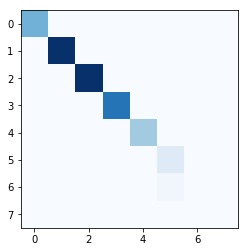

In [48]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_class, y_pred_class))

cm = confusion_matrix(y_test_class, y_pred_class)
plt.imshow(cm, cmap='Blues');

In [59]:
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test_class, y_pred_class)*100, 2),'%')

Test accuracy for our ANN model: 100.0 %


### Improve the model

Try to improve your model by exprimenting in a variety of ways:

- different number of layers
- different number of neurons in each layer
- other activation functions
- other loss functions
- other optimizers

Compare and report your results.

In [50]:
# your code here ...
model2 = Sequential()
model2.add(Dense(18, input_dim = 40, activation = 'relu'))
model2.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
model2.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))
model2.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, validation_split=0.1, batch_size = 5, epochs = 25, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/25
7200/7200 - 1s - loss: 1.2673 - accuracy: 0.5121 - val_loss: 0.4697 - val_accuracy: 0.9513
Epoch 2/25
7200/7200 - 1s - loss: 0.2401 - accuracy: 0.9585 - val_loss: 0.1295 - val_accuracy: 0.9575
Epoch 3/25
7200/7200 - 1s - loss: 0.0723 - accuracy: 0.9875 - val_loss: 0.0625 - val_accuracy: 0.9950
Epoch 4/25
7200/7200 - 1s - loss: 0.0389 - accuracy: 0.9906 - val_loss: 0.0502 - val_accuracy: 0.9950
Epoch 5/25
7200/7200 - 1s - loss: 0.0176 - accuracy: 0.9967 - val_loss: 0.0396 - val_accuracy: 0.9987
Epoch 6/25
7200/7200 - 1s - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0383 - val_accuracy: 0.9987
Epoch 7/25
7200/7200 - 1s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0396 - val_accuracy: 0.9987
Epoch 8/25
7200/7200 - 1s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0394 - val_accuracy: 0.9987
Epoch 9/25
7200/7200 - 1s - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0386 - val_accuracy: 0.9987
Epoch 10/25
7200/7200 - 1s - loss: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       534
           2       1.00      1.00      1.00       535
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00       194
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Test accuracy for our ANN model: 100.0 %


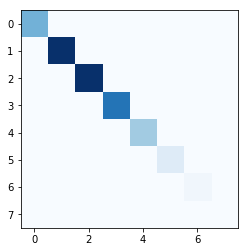

In [51]:
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_class, y_pred_class))

cm = confusion_matrix(y_test_class, y_pred_class)
plt.imshow(cm, cmap='Blues');
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test_class, y_pred_class)*100, 2),'%')

### Conclusion

So, what is your conclusion to the question "can AI read our mind"?

### your conclusions here ...
Given enough data I think AI is capable of "reading our minds".  With 8000 sets of data it was able to reconize an unspecified rule and give very accurate results. 